In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import shap
from pickle import dump
from pickle import load
from sklearn.preprocessing import OneHotEncoder
import keras_tuner as kt

2022-03-17 16:05:25.861764: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
tf.__version__
tf.test.is_built_with_cuda()

True

In [3]:
X_train = pd.read_csv('X_train.csv')
X_val = pd.read_csv('X_val.csv')
y_train = pd.read_csv('y_train.csv')
y_val = pd.read_csv('y_val.csv')

In [4]:
# Import `Sequential` from `keras.models`
from tensorflow.keras.models import Sequential
# Import `Dense` from `keras.layers`
from tensorflow.keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Add one hidden layer 
model.add(Dense(16, activation='relu',))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

2022-03-17 16:05:27.988783: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-17 16:05:27.989380: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-17 16:05:27.994540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-17 16:05:27.994840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.86GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2022-03-17 16:05:27.994866: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-03-17 16:05:27.996015: I tensorflow/stream_executor/platform/def

2022-03-17 16:05:28.518791: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-17 16:05:28.519072: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600000000 Hz


Epoch 1/200
  51/1762 [..............................] - ETA: 1s - loss: 6.7643 - accuracy: 0.6859   

2022-03-17 16:05:28.752557: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1762/1762 [==============================] - 3s 1ms/step - loss: 1.2650 - accuracy: 0.6277 - val_loss: 0.6599 - val_accuracy: 0.6467
Epoch 2/200
1762/1762 [==============================] - 2s 1ms/step - loss: 0.6426 - accuracy: 0.6507 - val_loss: 0.6434 - val_accuracy: 0.6410
Epoch 3/200
1762/1762 [==============================] - 2s 1ms/step - loss: 0.6429 - accuracy: 0.6396 - val_loss: 0.6333 - val_accuracy: 0.6399
Epoch 4/200
1762/1762 [==============================] - 2s 1ms/step - loss: 0.6365 - accuracy: 0.6454 - val_loss: 0.6426 - val_accuracy: 0.6403
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


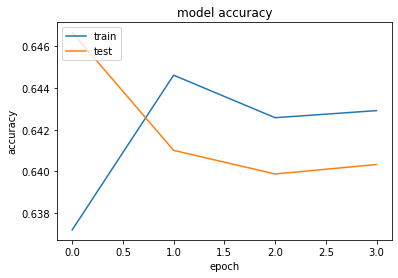

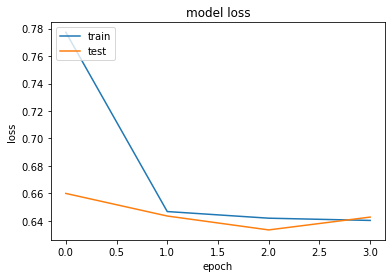

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss')                   
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=1,callbacks=[es])
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
def eval_metrics(X,Y):
    ac = accuracy_score(X,Y) * 100
    cm = confusion_matrix(X,Y)
    ps = precision_score(X,Y)
    rs = recall_score(X,Y)
    ss = f1_score(X,Y)
    print(f"""accuracy: {ac},\nconfusion matrix: {cm}, \nprecision score: {ps}, recall score: {rs}, f1 score: {ss}""")
    return ac, cm, ps, rs, ss
    

In [7]:
y_pred = model.predict(X_val)

In [8]:
y_pred

array([[0.6450555 ],
       [0.6818361 ],
       [0.7049338 ],
       ...,
       [0.5916863 ],
       [0.576035  ],
       [0.46967623]], dtype=float32)

In [9]:
keras.metrics.binary_accuracy(y_val, y_pred, threshold=0.5)


<tf.Tensor: shape=(5505,), dtype=float32, numpy=array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)>

In [10]:
seq_predictions = list(map(lambda x: 0 if x<0.6 else 1, y_pred))


In [11]:
eval_metrics(y_val,seq_predictions)

accuracy: 60.962761126248864,
confusion matrix: [[ 966 1045]
 [1104 2390]], 
precision score: 0.6957787481804949, recall score: 0.6840297653119634, f1 score: 0.6898542358204647


(60.962761126248864,
 array([[ 966, 1045],
        [1104, 2390]]),
 0.6957787481804949,
 0.6840297653119634,
 0.6898542358204647)

In [12]:
from sklearn import metrics
def buildROC(target_test,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    print(f"ROC_AUC Score = {roc_auc*100}")
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

ROC_AUC Score = 58.2193898071198


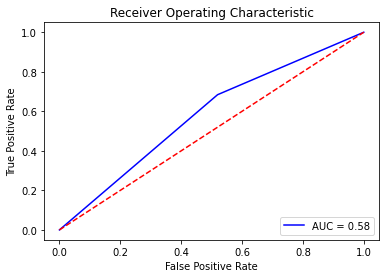

In [13]:
buildROC(y_val,seq_predictions)

In [16]:
X_val.iloc[4500:]

,EAL,Gender,MedicalFlag,PPIndicator,SafeGuarding,SENIndicator,DistanceKm,LatePercentage,StartedLate,Positive,...,DfE main .1_MWBA,DfE main .1_MWBC,DfE main .1_NOBT,DfE main .1_OOTH,DfE main .1_REFU,DfE main .1_WBRI,DfE main .1_WIRI,DfE main .1_WIRT,DfE main .1_WOTH,DfE main .1_WROM
4500,0,0,0,0,0,0,2,0.00,0,0,...,0,0,0,0,0,1,0,0,0,0
4501,0,0,0,0,0,0,1,0.00,0,0,...,0,0,0,0,0,1,0,0,0,0
4502,0,0,0,0,0,0,1,10.77,0,0,...,0,0,0,0,0,1,0,0,0,0
4503,0,0,0,0,0,0,5,1.24,0,0,...,0,0,0,0,0,1,0,0,0,0
4504,0,0,0,0,0,0,1,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5500,0,0,0,0,0,0,4,0.00,0,0,...,0,0,0,0,0,1,0,0,0,0
5501,0,0,0,0,0,0,1,0.00,0,0,...,0,0,0,0,0,1,0,0,0,0
5502,0,0,0,0,0,0,2,0.65,0,20,...,0,0,0,0,0,0,0,0,0,0
5503,0,0,0,0,0,0,1,0.63,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                560       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


In [70]:
data_for_prediction = X_val.iloc[0:1,:].values.astype('float')
background = X_train.iloc[0:2000,:].values.astype('float')

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%time
explainer = shap.KernelExplainer(model, background)
shap_values = explainer.shap_values(data_for_prediction )

In [68]:
data_for_prediction

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  3.92,  0.  ,
         0.  ,  0.  ,  0.  , 92.81,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [74]:
X_val.columns

Index(['EAL', 'Gender', 'MedicalFlag', 'PPIndicator', 'SafeGuarding',
       'SENIndicator', 'DistanceKm', 'LatePercentage', 'StartedLate',
       'Positive', 'Negative', 'FIXD', 'percentageattendance', 'summerborn',
       'DfE main .1_ABAN', 'DfE main .1_AIND', 'DfE main .1_AOTH',
       'DfE main .1_APKN', 'DfE main .1_BAFR', 'DfE main .1_BCRB',
       'DfE main .1_BOTH', 'DfE main .1_CHNE', 'DfE main .1_MOTH',
       'DfE main .1_MWAS', 'DfE main .1_MWBA', 'DfE main .1_MWBC',
       'DfE main .1_NOBT', 'DfE main .1_OOTH', 'DfE main .1_REFU',
       'DfE main .1_WBRI', 'DfE main .1_WIRI', 'DfE main .1_WIRT',
       'DfE main .1_WOTH', 'DfE main .1_WROM'],
      dtype='object')

In [75]:
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction, feature_names =X_val.columns )



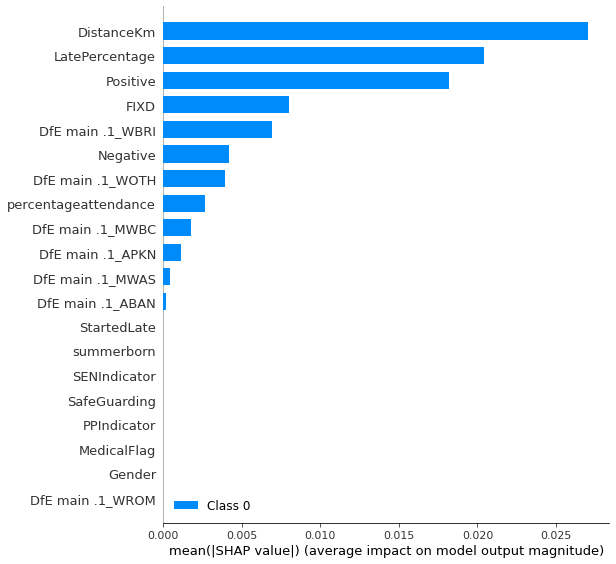

In [40]:
shap.summary_plot(shap_values, X_val)
